# Jaccard's Metric Introduction

+ Author: Casey Whorton
+ Last Edited: 1/21/2021

This notebook introduces the Jaccard measure of similarity using a sample dataset. What's interesting about this measure is it provides a way to measure similarity (distance) between samples that only contain binary data (0 or 1).

**Definition**

Jaccard's Similarity Score := $\frac{X \cap Y}{X \cup Y} = \frac{X \cap Y}{X + Y - X \cap Y}$

So, when comparing to sets (which can be an array, a series, or even a vector of binary values) the numerator is the count of elements shared between the sets and the denominator is the count of elements from both sets. In our case, the denominator is the size of the either set, so we can also say that this similarity score is the number of shared elements divided by the number of elements that could be shared.

In [310]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_covtype
from sklearn.metrics import jaccard_score

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import jaccard

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Data & Preprocessing

In [446]:
x0 = np.random.choice([0, 1], size=(100000,100), p=[4./5, 1./5])
x1 = np.random.choice([0, 1], size=(100000,100), p=[1./3, 2./3])
x2 = np.random.choice([0, 1], size=(100000,100), p=[1./2, 1./2])

In [465]:
colnames = ['x_'+str(i) for i in range(0,100)]

X = pd.DataFrame(data = np.stack([x0,x1,x2]).reshape(300000,100))
X.columns = colnames

X_sample = X.sample(1000)

target = np.ones(100).astype(int)

In [448]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Simple Example

In [482]:
x = [[1,1,1],[1,0,1],[0,0,0]]
print(x)

[[1, 1, 1], [1, 0, 1], [0, 0, 0]]


In [487]:
jaccard_score(x[0],x[1])

0.6666666666666666

In [489]:
jaccard(x[0],x[1])

0.3333333333333333

In [454]:
pairwise_distances(x, metric = jaccard)

array([[0.        , 0.33333333, 1.        ],
       [0.33333333, 0.        , 1.        ],
       [1.        , 1.        , 0.        ]])

# Hierarchical Clustering

+ Distance Matrix
+ Dendrogram

In [475]:
%%time
D = pairwise_distances(X_sample, metric = jaccard)
D.shape

Wall time: 12.6 s


(1000, 1000)

Dendrogram

C:\Users\casey\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
<timed exec>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


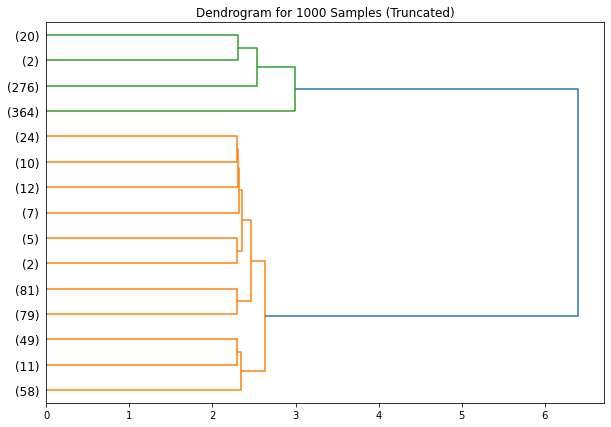

Wall time: 1.26 s


In [477]:
%%time
clustering = AgglomerativeClustering(n_clusters=3).fit(D)

linked = linkage(D, 'average')

labelList = clustering.labels_

plt.figure(figsize=(10, 7))

dendrogram(linked,
           p=15,
           orientation='right',
           labels=labelList,
           distance_sort='descending',
           show_leaf_counts=True,
           truncate_mode='lastp')

plt.title('Dendrogram for 1000 Samples (Truncated)')
plt.savefig('Dendrogram.png')
plt.show()

# Comparison

In [458]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [459]:
target.shape

(100,)

In [460]:
%%time
from functools import partial
import multiprocessing as mp

partial_jaccard = partial(jaccard_score, target)

with mp.Pool() as pool:
    results = pool.map(partial_jaccard, [row for row in X.values])

Wall time: 51.9 s


## Results

In [461]:
sim_df = pd.DataFrame(data = {'Jaccards Similarity Score': pd.Series(results).value_counts().index,
                     'Count': pd.Series(results).value_counts().values})

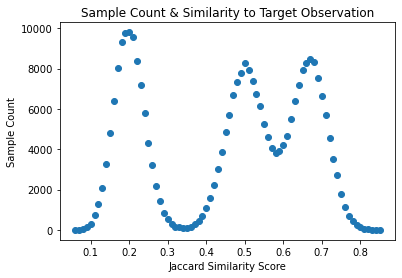

In [478]:
plt.scatter(x = sim_df['Jaccards Similarity Score'], y = sim_df['Count'])
plt.title('Sample Count & Similarity to Target Observation')
plt.ylabel('Sample Count')
plt.xlabel('Jaccard Similarity Score')
plt.savefig('Similarity_Count.png')
plt.show()

# References

+ https://en.wikipedia.org/wiki/Jaccard_index
+ https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html
+ https://docs.python.org/3/library/multiprocessing.html